# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
print(tradeapi)

<module 'alpaca_trade_api' from 'C:\\Users\\hatti\\anaconda3\\envs\\alpacaenv\\lib\\site-packages\\alpaca_trade_api\\__init__.py'>


## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

#requests.get(btc_url), (eth_url.json()
requests.get(btc_url), requests.get(eth_url)

(<Response [200]>, <Response [200]>)

In [6]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
price_eth = eth_data['data']['1027']['quotes']['USD']['price']
print(eth_data)

{'data': {'1027': {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'website_slug': 'ethereum', 'rank': 2, 'circulating_supply': 113192927, 'total_supply': 113192927, 'max_supply': 0, 'quotes': {'USD': {'price': 387.11, 'volume_24h': 11593071757, 'market_cap': 43820351121, 'percentage_change_1h': -0.946112466959931, 'percentage_change_24h': -4.03191287549121, 'percentage_change_7d': 5.12710820458319, 'percent_change_1h': -0.946112466959931, 'percent_change_24h': -4.03191287549121, 'percent_change_7d': 5.12710820458319}, 'CAD': {'price': 514.314346, 'volume_24h': 15402555136.3502, 'market_cap': 58219718499.3606, 'percent_change_1h': -0.946112466959931, 'percent_change_24h': -4.03191287549121, 'percent_change_7d': 5.12710820458319}}, 'last_updated': 1603893888}}, 'metadata': {'timestamp': 1603893888, 'num_cryptocurrencies': 1430, 'error': None}}


In [7]:
price_eth

387.11

In [8]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
price_btc = btc_data['data']['1']['quotes']['USD']['price']
print(btc_data)

{'data': {'1': {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'website_slug': 'bitcoin', 'rank': 1, 'circulating_supply': 18528475, 'total_supply': 18528475, 'max_supply': 21000000, 'quotes': {'USD': {'price': 13122.19, 'volume_24h': 26848994756, 'market_cap': 243345003974, 'percentage_change_1h': -1.4964012074498, 'percentage_change_24h': -1.94015662681081, 'percentage_change_7d': 10.1898884735009, 'percent_change_1h': -1.4964012074498, 'percent_change_24h': -1.94015662681081, 'percent_change_7d': 10.1898884735009}, 'CAD': {'price': 17434.141634, 'volume_24h': 35671574432.8216, 'market_cap': 323308172279.856, 'percent_change_1h': -1.4964012074498, 'percent_change_24h': -1.94015662681081, 'percent_change_7d': 10.1898884735009}}, 'last_updated': 1603893887}}, 'metadata': {'timestamp': 1603893887, 'num_cryptocurrencies': 1430, 'error': None}}


In [9]:
price_btc

13122.19

In [10]:
# Fetch current ETH price
price_eth = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc = price_btc
my_eth_value = my_etch = price_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 13122.19 BTC is $13122.19
The current value of your 5.3 ETH is $387.11


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
al_data = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key, 
    api_version="v2") 
print(al_data)

In [14]:
# Format current date as ISO format
now = pd.Timestamp('2020-10-27', tz="US/mountain").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D" 

# Get current closing prices fro SPY and AGG
investment_df = al_data.get_barset(
    tickers, 
    timeframe, 
    start = now
).df

#Preview DataFrame
investment_df

AGG                                        \
                             open     high       low     close   volume   
2020-10-27 00:00:00-04:00  117.80  117.910  117.7275  117.8700  5016038   
2020-10-28 00:00:00-04:00  117.81  117.955  117.8100  117.9058   988073   

                              SPY                                     
                             open    high     low    close    volume  
2020-10-27 00:00:00-04:00  339.76  340.12  337.99  338.250  50634843  
2020-10-28 00:00:00-04:00  332.10  332.84  330.19  330.289  13197963

In [15]:
# Pick AGG and SPY close prices #convert to float
agg_close_price = investment_df["AGG"]["close"][0]
spy_close_price = investment_df["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"current AGG close price: ${agg_close_price}")
print(f"current SPY close price: ${spy_close_price}")

current AGG close price: $117.87
current SPY close price: $338.25


In [16]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16912.50
The current value of your 200 AGG shares is $23574.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame(
    [
        [my_btc_value + my_eth_value], 
        [my_spy_value + my_agg_value]
    ], 
    index = ["Crypto Value", "Stock Value"], 
    columns = ["amount"])

# Display savings DataFrame
display(df_savings)

,amount
Crypto Value,13509.3
Stock Value,40486.5


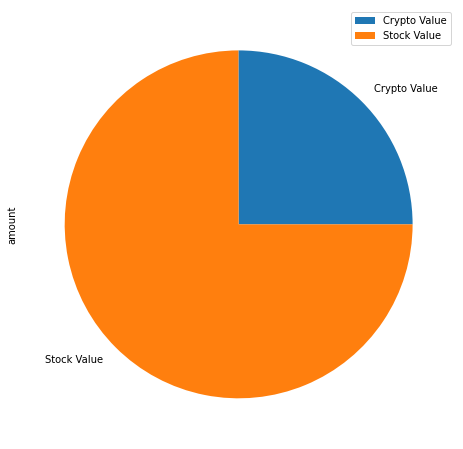

In [18]:
# Plot savings pie chart
df_savings.plot(kind = "pie", y = "amount", figsize = (8, 8))

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings["amount"]["Crypto Value"] + \
    df_savings["amount"]["Stock Value"]

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations for having enough money in this fund!")
elif total_savings == emergency_fund:
    print("Congratulations for reaching your financial goal.")
else:
    print(f"You are ${(emergency_fund - total_savings):0.2f} away from reaching your goal.")

Congratulations for having enough money in this fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='US/central').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='US/central').isoformat()

In [21]:
start_date

'2015-08-07T00:00:00-05:00'

In [22]:
end_date

'2020-08-07T00:00:00-05:00'

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = al_data.get_barset(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.40,.60],
    num_simulation = 500, 
    num_trading_days = 30*252,
)

In [25]:
# Printing the simulation input data
MC_30_year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995263,0.992162,0.996201,0.998381,0.982198,1.002732,1.006310,1.009426,1.008946,1.011090,...,0.997295,0.999827,0.997648,0.997711,1.007145,1.006850,1.001411,0.990195,0.986585,1.005833
2,0.995987,1.007570,0.987256,1.004380,0.978172,1.006429,1.012794,1.015498,1.006813,1.012934,...,0.996834,0.997888,0.998977,1.004707,1.012716,1.005102,0.992641,0.989168,0.983098,1.016606
3,1.010657,1.011675,0.997017,1.007775,0.985178,1.001579,1.015212,1.006707,1.013047,1.020670,...,0.994356,0.994698,0.985270,1.002703,1.009341,1.008750,1.007894,0.987264,0.993125,1.019524
4,1.027581,1.011465,1.007937,1.000886,0.968157,0.990222,1.007070,1.007717,1.014162,1.019316,...,0.993708,0.977179,0.995562,1.005456,1.022384,1.006953,1.005236,0.992845,0.996414,1.011623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.762634,12.125000,28.620830,19.426641,3.638420,7.147168,8.366731,14.769598,7.249501,12.725803,...,13.573752,7.013731,6.516312,26.234252,5.538847,4.687105,4.858262,2.761099,10.451078,4.642395
7557,3.798604,12.136235,28.621337,19.496495,3.587732,7.141006,8.290524,14.696649,7.189041,12.835028,...,13.570892,7.045398,6.592161,26.398791,5.496867,4.704655,4.914671,2.762032,10.589423,4.670157
7558,3.837804,12.243457,28.268091,19.455567,3.596516,7.088813,8.217015,14.980052,7.220287,12.671674,...,13.684236,7.036043,6.624815,26.455349,5.523794,4.701995,4.954310,2.770372,10.622152,4.705621
7559,3.797387,12.340860,28.721220,19.482782,3.547097,7.073746,8.187049,14.990512,7.214730,12.665086,...,13.562171,7.048250,6.648691,26.575803,5.502049,4.733649,5.039749,2.776042,10.608385,4.700362


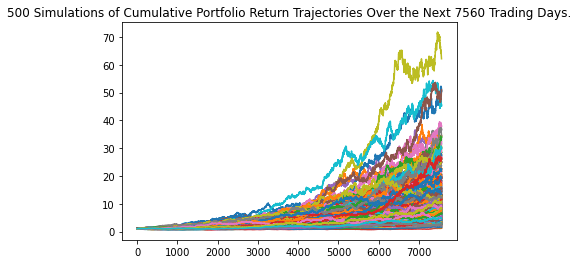

In [27]:
# Plot simulation outcomes
line_plot = MC_30_year.plot_simulation()

# Save plot for future use
line_plot.get_figure().savefig("mc_sim_plot.png", bbox_inches="tight")

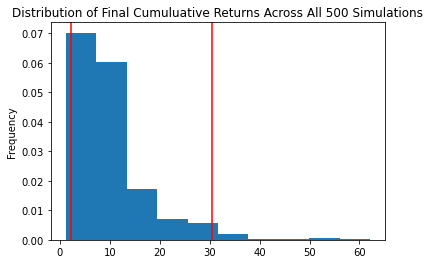

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('mc_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_30_year.summarize_cumulative_return() 

# Print summary statistics
print(summary_statistics) #central limit theorm

count           500.000000
mean             10.224714
std               7.615025
min               1.171861
25%               5.456750
50%               8.215368
75%              12.427196
max              62.141785
95% CI Lower      2.253522
95% CI Upper     30.441408
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round((summary_statistics[8] * initial_investment),2)
ci_upper = round((summary_statistics[9] * initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $45070.45 and $608828.15


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round((summary_statistics[8] * initial_investment),2)
ci_upper = round((summary_statistics[9] * initial_investment),2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $67605.67 and $913242.23


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [34]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.80,.20],
    num_simulation = 100, 
    num_trading_days = 5*252,
)

In [35]:
# Printing the simulation input data
MC_5_year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [36]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001035,1.004011,0.998365,0.993630,1.000268,1.003242,1.001569,0.998869,1.002276,1.000584,...,0.998703,1.004450,0.995673,0.998030,0.996005,1.002498,1.003671,0.998153,1.002883,1.001627
2,1.004066,1.000633,0.996469,0.992050,0.998908,1.003667,1.003383,0.989657,0.999870,0.994643,...,1.000074,0.998891,0.997885,0.993552,0.993297,1.003815,1.011989,0.996764,1.002147,0.992928
3,1.006365,1.003538,0.995458,0.993905,0.998427,1.005284,1.006158,0.994876,0.999122,0.991501,...,1.000067,1.001629,0.998723,0.993139,0.995991,1.008664,1.013677,0.995368,1.000421,0.992508
4,1.011956,1.005081,0.994215,0.994321,0.997885,1.005917,1.011775,0.991240,0.997313,0.985377,...,1.005067,0.999849,1.000648,0.991623,0.999769,1.013625,1.009039,0.997408,1.002102,0.996094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.089837,1.244946,1.128566,1.451508,1.065032,0.965545,1.129944,1.184799,1.182289,1.158386,...,1.266763,1.170188,1.279818,1.135796,1.338341,0.999937,1.284311,1.001275,1.234602,1.012714
1257,1.092621,1.247631,1.126523,1.450254,1.064292,0.962386,1.133693,1.181816,1.184058,1.162213,...,1.271641,1.176258,1.286500,1.139434,1.337081,1.000117,1.292082,1.004389,1.236316,1.009108
1258,1.097980,1.245611,1.129647,1.447661,1.068063,0.959292,1.133969,1.181087,1.182540,1.165715,...,1.273347,1.180391,1.279848,1.135056,1.340103,0.998507,1.292802,1.003831,1.231752,1.001903
1259,1.101255,1.246959,1.129828,1.448147,1.067553,0.956170,1.132077,1.186679,1.177041,1.166923,...,1.275630,1.182860,1.286016,1.134183,1.341853,0.999954,1.286610,1.004570,1.227850,1.001830


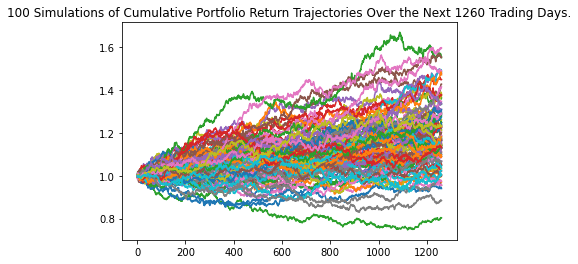

In [37]:
# Plot simulation outcomes
line_plot = MC_5_year.plot_simulation()

# Save plot for future use
line_plot.get_figure().savefig("mc_sim_plot.png", bbox_inches="tight")

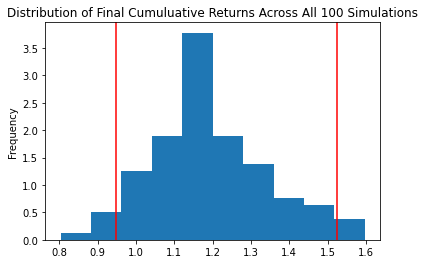

In [38]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('mc_dist_plot.png',bbox_inches='tight')

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_5_year.summarize_cumulative_return() 

# Print summary statistics
print(summary_statistics) #central limit theorm

count           100.000000
mean              1.187071
std               0.151784
min               0.803466
25%               1.092165
50%               1.164706
75%               1.276308
max               1.596882
95% CI Lower      0.947506
95% CI Upper      1.523008
Name: 1260, dtype: float64


In [52]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = round((summary_statistics[8] * initial_investment),2)
ci_upper_five = round((summary_statistics[9] * initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $18950.12 and $30460.17


In [53]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_five = round((summary_statistics[8] * initial_investment),2)
ci_upper_five = round((summary_statistics[9] * initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $28425.18 and $45690.25


### Ten Years Retirement Option

In [54]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year = MCSimulation(
    portfolio_data = df_stock_data, 
    weights = [.30,.70],
    num_simulation = 150, 
    num_trading_days = 10*252,
)

In [55]:
# Printing the simulation input data
MC_10_year.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [56]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007133,0.990266,0.996968,1.005153,1.000243,1.001894,1.003140,1.004852,0.999328,1.001188,...,1.006014,1.002096,1.018321,0.990567,0.975330,0.996157,0.994099,0.997839,0.990917,1.013146
2,1.017589,0.993051,0.988251,1.019023,1.009133,0.993686,1.005666,1.001537,1.000724,1.004365,...,1.003102,1.005917,1.017115,0.992004,0.986771,1.007245,0.994625,0.999137,1.010743,1.000661
3,1.004474,0.997964,0.984171,1.018763,0.993038,0.988280,1.006057,1.010246,0.989231,1.010991,...,0.990893,1.017842,1.013840,0.991355,0.977743,1.007118,0.992658,1.000277,1.014299,1.004803
4,0.988891,0.999463,0.979971,1.017386,0.987692,0.989087,1.008071,0.997060,0.976159,1.001560,...,0.989841,1.016149,1.010331,0.985409,0.977295,1.000954,0.989929,1.011199,1.015913,1.002119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.156900,1.303378,2.871183,2.407728,3.987700,1.930943,2.520249,2.343628,4.482076,3.624484,...,2.110578,1.734449,4.834069,1.734807,1.320012,1.765720,2.778754,2.183020,1.515162,2.573559
2517,1.175640,1.297531,2.834092,2.415809,4.033416,1.976998,2.518664,2.344859,4.503368,3.607601,...,2.101740,1.750993,4.862195,1.739945,1.327894,1.768080,2.823389,2.192372,1.506239,2.598770
2518,1.166344,1.286715,2.800814,2.378272,4.060838,1.992215,2.508681,2.321363,4.476524,3.644059,...,2.120435,1.741434,4.879844,1.736228,1.333812,1.766151,2.807187,2.174341,1.501358,2.636328
2519,1.162726,1.293241,2.809799,2.410429,4.031092,2.010230,2.519886,2.329670,4.452979,3.642879,...,2.115863,1.734468,4.854021,1.711128,1.332024,1.779994,2.825356,2.165539,1.507616,2.647380


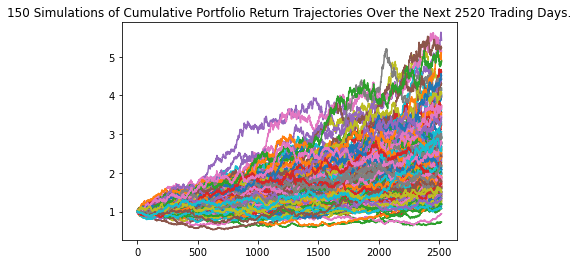

In [57]:
# Plot simulation outcomes
line_plot = MC_10_year.plot_simulation()

# Save plot for future use
line_plot.get_figure().savefig("mc_sim_plot.png", bbox_inches="tight")

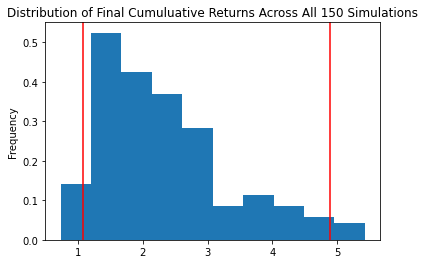

In [58]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('mc_dist_plot.png',bbox_inches='tight')

In [59]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_10_year.summarize_cumulative_return() 

# Print summary statistics
print(summary_statistics) #central limit theorm

count           150.000000
mean              2.334903
std               1.010694
min               0.728137
25%               1.582400
50%               2.084858
75%               2.782825
max               5.428416
95% CI Lower      1.082783
95% CI Upper      4.891718
Name: 2520, dtype: float64


In [60]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_ten = round((summary_statistics[8] * initial_investment),2)
ci_upper_ten = round((summary_statistics[9] * initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $21655.65 and $97834.37


In [61]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower_ten = round((summary_statistics[8] * initial_investment),2)
ci_upper_ten = round((summary_statistics[9] * initial_investment),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $32483.48 and $146751.55
